# Chapter 7

In [1]:
library(rtweet)
library (syuzhet)
library(ggplot2)


Warning message:
"package 'rtweet' was built under R version 3.6.1"Warning message:
"package 'syuzhet' was built under R version 3.6.1"
Attaching package: 'syuzhet'

The following object is masked from 'package:rtweet':

    get_tokens

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


## Twitter Sentiment Analysis

Registered S3 method overwritten by 'openssl':
  method      from
  print.bytes Rcpp


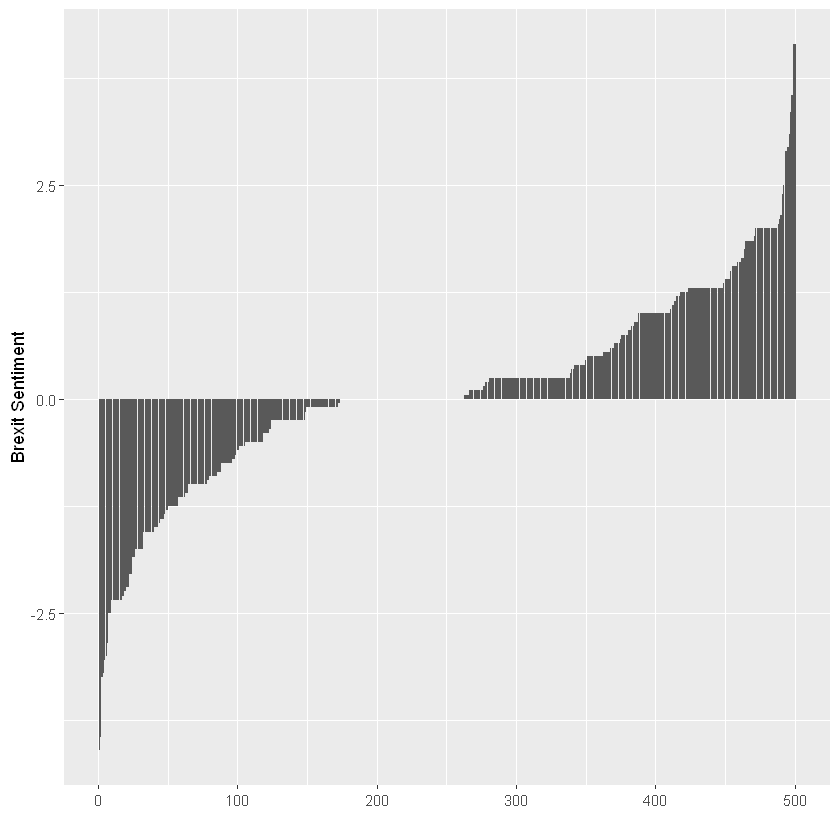

In [2]:
# XXXXXX’s should be replaced by  your own app details
appname = "XXXXXX"
key="XXXXXX"
secret = "XXXXXX"
access_token="XXXXXX"
access_secret="XXXXXX"

twitter_token <- create_token(
  app = appname,
  consumer_key = key,
  consumer_secret = secret,
  access_token = access_token,
  access_secret = access_secret)

brxTwts <- search_tweets(q = "#Brexit", n = 500)

brxTwts$plaintext <- sapply(brxTwts$text,function(x) iconv(x, 'latin1', 'ASCII', sub=''))
brxTwts$plaintext <- apply(brxTwts[, 'plaintext'], 1, function(x) {gsub('#\\S+', '', x)})
brxTwts$plaintext <- apply(brxTwts[, 'plaintext'], 1, function(x) {gsub('@\\S+', '', x)})
brxTwts$plaintext <- apply(brxTwts[, 'plaintext'], 1, function(x) {gsub("https://[[:graph:]]*",'', x)})
    
brxTwts$syuzhet <- apply(brxTwts[, 'plaintext'], 1, function(x){sum(get_sentiment(get_sentences(x), method="syuzhet")) } )

brxTwts <- brxTwts[order(brxTwts$syuzhet),]
ggplot(data= brxTwts, aes(x=as.numeric(row.names(brxTwts)), y= brxTwts $syuzhet))+geom_bar(stat='identity') + xlab(' ') + ylab('Brexit Sentiment')


## Topic Modelling Digital Libraries

In [3]:
library(aRxiv)
library(tm)
library(topicmodels)

arxivDF <- arxiv_search('cat:cs.DL', limit=1000)

corpus <- tm::Corpus(VectorSource(as.vector(arxivDF$abstract)))
corpus <- tm_map(corpus,content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, stripWhitespace)
corpus <- tm_map(corpus, removeWords, stopwords("english"))

dtm <- tm::DocumentTermMatrix(corpus)
T = 4 # number of topics
alpha = 50/T # dirichlet prior alpha
beta = 0.1 # dirichlet prior beta
model = topicmodels::LDA(dtm,
                         k = T,
                         method = "Gibbs",
                         control = list(alpha=alpha,
                                        delta=beta))
print(as.matrix(terms(model,10)))


Warning message:
"package 'aRxiv' was built under R version 3.6.1"Warning message:
"package 'tm' was built under R version 3.6.1"Loading required package: NLP

Attaching package: 'NLP'

The following object is masked from 'package:ggplot2':

    annotate

Warning message:
"package 'topicmodels' was built under R version 3.6.1"retrieved batch 1
retrieved batch 2
retrieved batch 3
retrieved batch 4
retrieved batch 5
Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("english")):
"transformation drops documents"

      Topic 1       Topic 2      Topic 3    Topic 4      
 [1,] "digital"     "citation"   "data"     "can"        
 [2,] "web"         "journals"   "research" "information"
 [3,] "metadata"    "science"    "new"      "results"    
 [4,] "information" "journal"    "will"     "used"       
 [5,] "resources"   "papers"     "open"     "users"      
 [6,] "content"     "scientific" "access"   "systems"    
 [7,] "knowledge"   "impact"     "paper"    "search"     
 [8,] "library"     "analysis"   "provide"  "network"    
 [9,] "system"      "articles"   "system"   "using"      
[10,] "language"    "citations"  "database" "documents"  


## Term Frequency

data information         can    citation         web       paper 
        360         227         221         221         184         182 
    digital    journals    research      system  scientific     science 
        176         158         148         145         140         135 
    journal     results       model      papers      access       using 
        126         124         118         116         110         106 
        new        used 
        106         105

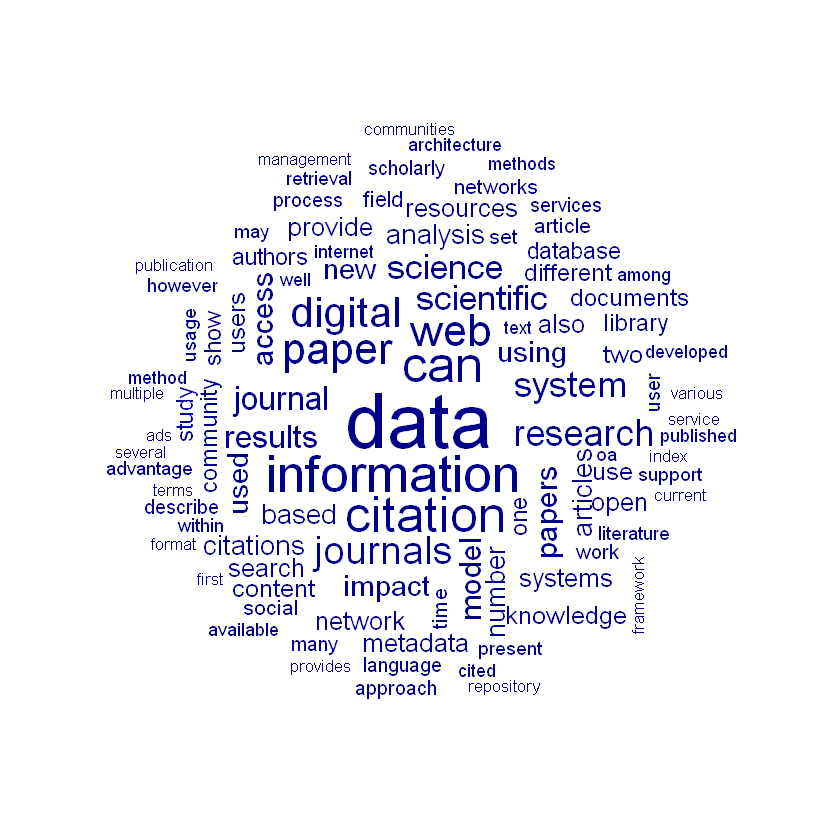

In [5]:
library(quanteda)
library(ggplot2) 

absCorp <- quanteda::corpus(arxivDF$abstract) 

absDFM<-dfm(absCorp, remove = stopwords("english"), remove_punct = TRUE)
topfeatures(absDFM, 20)

textplot_wordcloud(absDFM, max_words=100)

## N-Grams

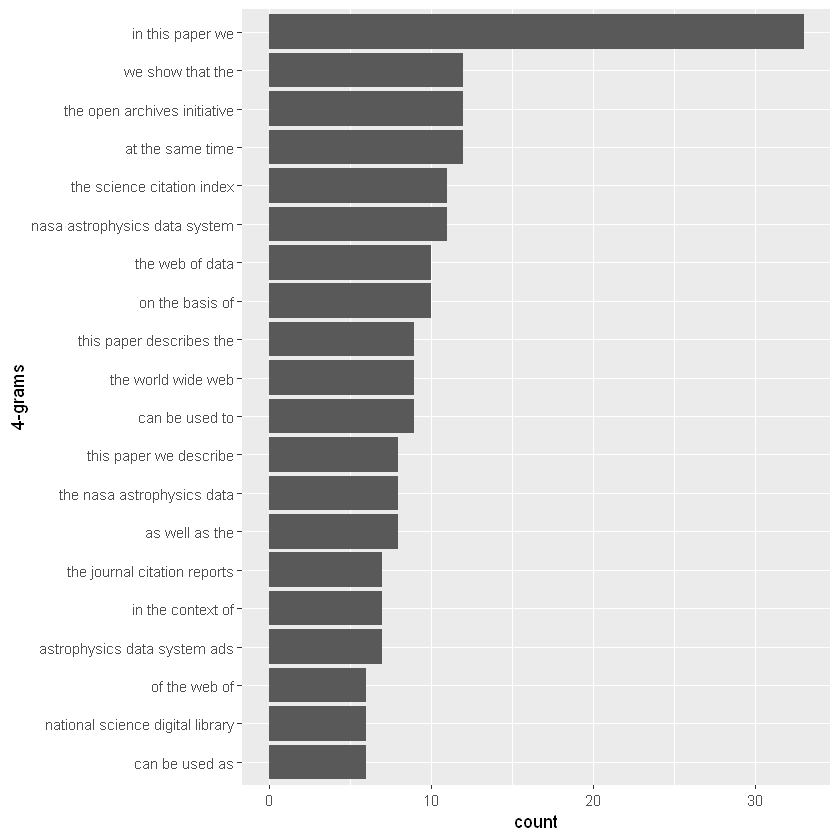

In [7]:
absToks<-tokens(absCorp, ngrams=4, concatenator = " ", remove_numbers=TRUE,
       remove_punct=TRUE)
absNgrams<-topfeatures(dfm(absToks), n=20)

ngramDF<-as.data.frame(absNgrams)
ggplot(ngramDF, aes(x=reorder(row.names(ngramDF), ngramDF$absNgrams),y=ngramDF$absNgrams) )+ geom_bar(stat="identity")+ coord_flip() + xlab('4-grams') + ylab('count')


## Burst detection 

retrieved batch 1
retrieved batch 2
retrieved batch 3
retrieved batch 4
retrieved batch 5
retrieved batch 6
retrieved batch 7


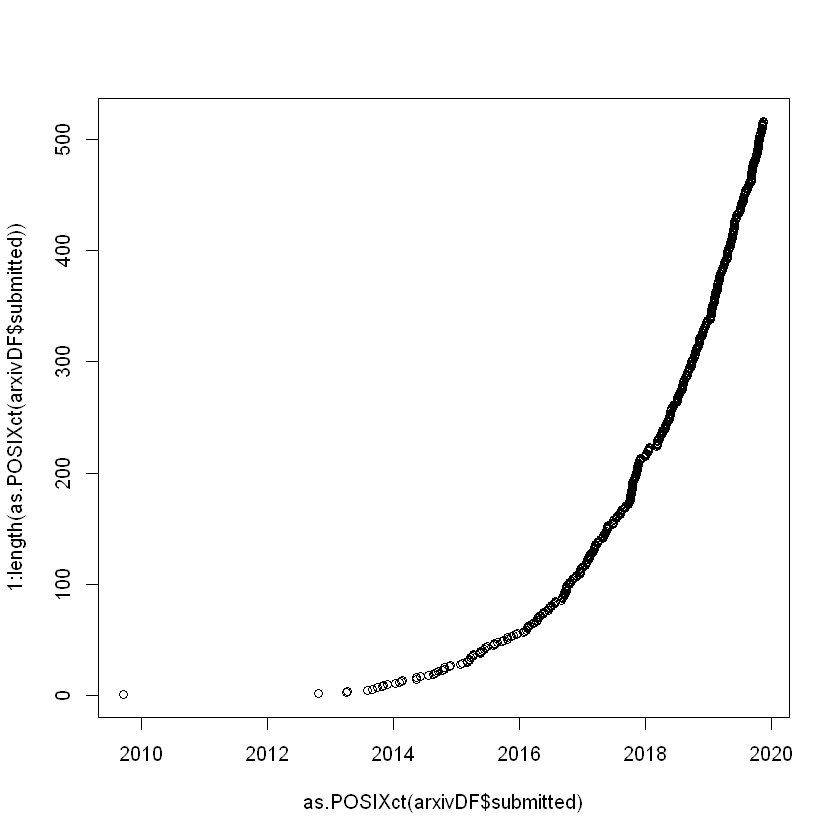

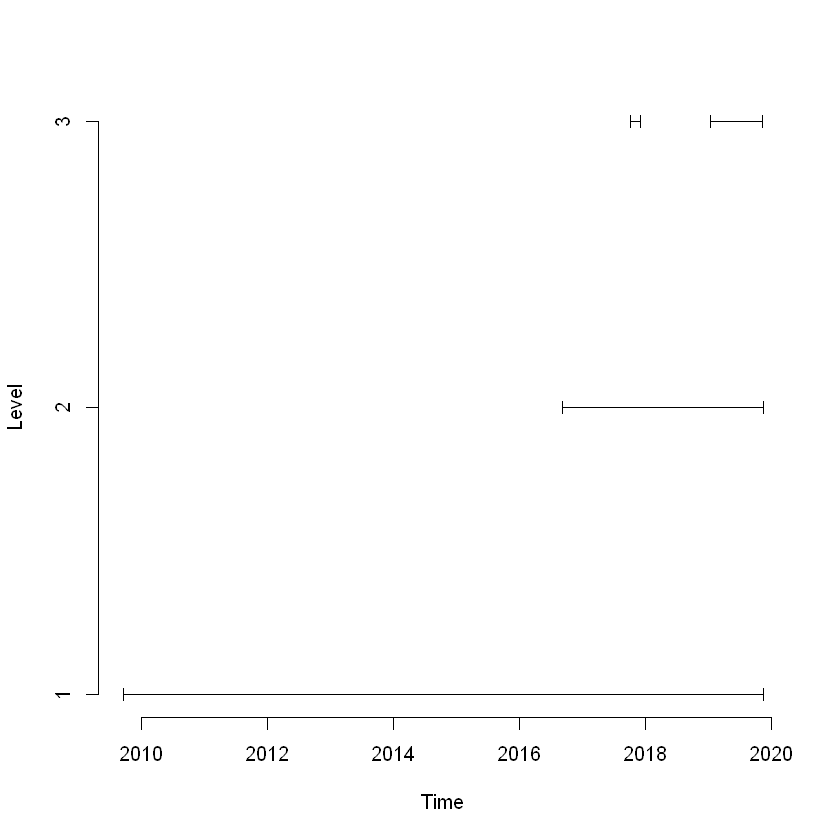

In [8]:
library(aRxiv)
library(bursts)
arxivDF <- arxiv_search('abs:"data science"', limit=1000)
bursts<-kleinberg(as.POSIXct(arxivDF$submitted))

#accumulation of submissions
plot(as.POSIXct(arxivDF$submitted),1:length(as.POSIXct(arxivDF$submitted)))

#bursts in submissions
plot(bursts, xaxt = 'n')
axis.POSIXct(1, bursts$start)
